In [1]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

In [2]:
df = pd.read_csv("Final_Data_JC.csv")

In [6]:
df['gameday'] = pd.to_datetime(df['gameday'])

In [7]:
# get rest days
df = df.sort_values(["gsis_id", "gameday"])
df["days_since_last_game"] = df.groupby("gsis_id")["gameday"].diff().dt.days


In [9]:
df

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,team,report_primary_injury,report_status,gameday,weekday,played,listed_on_report,listed_out,missed_due_to_injury,days_since_last_game
0,0,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,1.0,K,SPEC,...,SF,NaN,NaN,2014-09-07,Sunday,True,False,False,False,NaN
1,1,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,2.0,K,SPEC,...,SF,NaN,NaN,2014-09-14,Sunday,True,False,False,False,7.0
2,2,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,3.0,K,SPEC,...,SF,NaN,NaN,2014-09-21,Sunday,True,False,False,False,7.0
3,3,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,4.0,K,SPEC,...,SF,NaN,NaN,2014-09-28,Sunday,True,False,False,False,7.0
4,4,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,5.0,K,SPEC,...,SF,NaN,NaN,2014-10-05,Sunday,True,False,False,False,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221579,221579,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,6.0,T,OL,...,CIN,NaN,NaN,NaT,NaN,False,False,False,False,NaN
221581,221581,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,13.0,T,OL,...,CIN,NaN,NaN,NaT,NaN,False,False,False,False,NaN
221584,221584,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,17.0,T,OL,...,CIN,Ankle,Questionable,NaT,NaN,False,True,True,True,NaN
221585,221585,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,18.0,T,OL,...,CIN,Ankle,Questionable,NaT,NaN,False,True,True,True,NaN


In [10]:
# if less than a week between games
df["short_week"] = df["days_since_last_game"] < 7


In [12]:
df[df['short_week'] == True]

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,report_primary_injury,report_status,gameday,weekday,played,listed_on_report,listed_out,missed_due_to_injury,days_since_last_game,short_week
6,6,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,7.0,K,SPEC,...,NaN,NaN,2014-10-19,Sunday,True,False,False,False,6.0,True
11,11,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,13.0,K,SPEC,...,NaN,NaN,2014-11-27,Thursday,True,False,False,False,4.0,True
14,14,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,16.0,K,SPEC,...,NaN,NaN,2014-12-20,Saturday,True,False,False,False,6.0,True
17,17,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2015.0,2.0,K,SPEC,...,NaN,NaN,2015-09-20,Sunday,True,False,False,False,6.0,True
22,22,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2015.0,7.0,K,SPEC,...,NaN,NaN,2015-10-22,Thursday,True,False,False,False,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221535,221535,00-0039919,Rome Odunze,2002-06-03,75.0,215.0,2024.0,13.0,WR,WR,...,NaN,NaN,2024-11-28,Thursday,True,False,False,False,4.0,True
221538,221538,00-0039919,Rome Odunze,2002-06-03,75.0,215.0,2024.0,16.0,WR,WR,...,NaN,NaN,2024-12-22,Sunday,True,False,False,False,6.0,True
221539,221539,00-0039919,Rome Odunze,2002-06-03,75.0,215.0,2024.0,17.0,WR,WR,...,NaN,NaN,2024-12-26,Thursday,True,False,False,False,4.0,True
221572,221572,00-0039924,Dallas Turner,2003-02-02,75.0,247.0,2024.0,16.0,LB,LB,...,NaN,NaN,2024-12-22,Sunday,True,False,False,False,6.0,True


In [13]:
# did player get injured next week binary outcome
df["injury_next_week"] = (
    df.groupby("gsis_id")["missed_due_to_injury"].shift(-1).fillna(False)
)


C:\Users\jenny\AppData\Local\Temp\ipykernel_49132\3939666665.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.groupby("gsis_id")["missed_due_to_injury"].shift(-1).fillna(False)


In [16]:
# snaps last week
df["snaps_last_week"] = df.groupby("gsis_id")["total_snaps"].shift(1)


In [15]:
# fatigue inidicators / build up ?
df["rolling_snaps_3"] = df.groupby("gsis_id")["total_snaps"].rolling(3).mean().reset_index(level=0, drop=True)


In [18]:
df

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,weekday,played,listed_on_report,listed_out,missed_due_to_injury,days_since_last_game,short_week,injury_next_week,rolling_snaps_3,snaps_last_week
0,0,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,1.0,K,SPEC,...,Sunday,True,False,False,False,NaN,False,False,NaN,NaN
1,1,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,2.0,K,SPEC,...,Sunday,True,False,False,False,7.0,False,False,NaN,11.0
2,2,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,3.0,K,SPEC,...,Sunday,True,False,False,False,7.0,False,False,8.666667,9.0
3,3,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,4.0,K,SPEC,...,Sunday,True,False,False,False,7.0,False,False,9.333333,6.0
4,4,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,5.0,K,SPEC,...,Sunday,True,False,False,False,7.0,False,False,10.666667,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221579,221579,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,6.0,T,OL,...,NaN,False,False,False,False,NaN,False,False,0.000000,0.0
221581,221581,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,13.0,T,OL,...,NaN,False,False,False,False,NaN,False,True,0.000000,0.0
221584,221584,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,17.0,T,OL,...,NaN,False,True,True,True,NaN,False,True,0.000000,0.0
221585,221585,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,18.0,T,OL,...,NaN,False,True,True,True,NaN,False,False,0.000000,0.0


### try modeling

In [37]:
import re

# combine categories
def normalize_injury(text):
    if text is None or str(text).strip() == "" or text == "None" or text == 'nan':
        return "None"
    
    t = text.lower()

    # 1. Knee
    if "knee" in t or "acl" in t or "pcl" in t or "mcl" in t or "meniscus" in t or "patella" in t:
        return "Knee"

    # 2. Ankle / Foot
    if "ankle" in t or "foot" in t or "toe" in t or "achilles" in t or "heel" in t:
        return "Ankle/Foot"

    # 3. Hamstring
    if "hamstring" in t or "hammie" in t:
        return "Hamstring"

    # 4. Quad / Thigh / Groin
    if "quad" in t or "quadricep" in t or "thigh" in t or "groin" in t:
        return "Quad/Thigh/Groin"

    # 5. Shoulder
    if "shoulder" in t or "rotator" in t or "ac joint" in t or "labrum" in t:
        return "Shoulder"

    # 6. Hip / Glute
    if "hip" in t or "glute" in t or "hip flexor" in t:
        return "Hip/Glute"

    # 7. Back
    if "back" in t or "lumbar" in t:
        return "Back"

    # 8. Neck
    if "neck" in t or "cervical" in t:
        return "Neck"

    # 9. Arm
    if "arm" in t or "bicep" in t or "tricep" in t or "forearm" in t:
        return "Arm"

    # 10. Wrist / Hand
    if "wrist" in t or "hand" in t or "finger" in t or "thumb" in t:
        return "Wrist/Hand"

    # 11. Chest / Rib
    if "chest" in t or "rib" in t or "sternum" in t:
        return "Chest/Rib"

    # 12. Abdomen / Core
    if "abdomen" in t or "abdominal" in t or "oblique" in t or "stomach" in t:
        return "Abdomen/Core"

    # 13. Concussion / Head
    if "concussion" in t or "head" in t or "migraine" in t:
        return "Head/Concussion"

    # 14. Illness / Non injury
    if "illness" in t or "flu" in t or "covid" in t or "non-injury" in t or "personal" in t or "rest" in t:
        return "Illness/OtherNonInjury"

    # 15. Suspension
    if "susp" in t:
        return "None"

    # 16. Fallback
    return "Other"


In [31]:
df["report_primary_injury"] = df["report_primary_injury"].fillna("None")
df["report_status"] = df["report_status"].fillna("None")

In [27]:
df['report_primary_injury'] = df['report_primary_injury'].astype('str')

In [74]:
# put injuries into cateogires
df["injury_category"] = df["report_primary_injury"].apply(normalize_injury)


In [39]:
df.injury_category.value_counts()

injury_category
None                      187637
Ankle/Foot                  7613
Knee                        5911
Hamstring                   3689
Quad/Thigh/Groin            2694
Other                       2654
Shoulder                    2587
Head/Concussion             2054
Back                        1349
Illness/OtherNonInjury      1276
Wrist/Hand                  1073
Hip/Glute                    988
Chest/Rib                    812
Neck                         680
Abdomen/Core                 374
Arm                          196
Name: count, dtype: int64

In [36]:
df

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,played,listed_on_report,listed_out,missed_due_to_injury,days_since_last_game,short_week,injury_next_week,rolling_snaps_3,snaps_last_week,injury_category
0,0,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,1.0,K,SPEC,...,True,False,False,False,NaN,False,False,NaN,NaN,Other
1,1,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,2.0,K,SPEC,...,True,False,False,False,7.0,False,False,NaN,11.0,Other
2,2,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,3.0,K,SPEC,...,True,False,False,False,7.0,False,False,8.666667,9.0,Other
3,3,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,4.0,K,SPEC,...,True,False,False,False,7.0,False,False,9.333333,6.0,Other
4,4,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,5.0,K,SPEC,...,True,False,False,False,7.0,False,False,10.666667,13.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221579,221579,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,6.0,T,OL,...,False,False,False,False,NaN,False,False,0.000000,0.0,Other
221581,221581,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,13.0,T,OL,...,False,False,False,False,NaN,False,True,0.000000,0.0,Other
221584,221584,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,17.0,T,OL,...,False,True,True,True,NaN,False,True,0.000000,0.0,Ankle/Foot
221585,221585,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,18.0,T,OL,...,False,True,True,True,NaN,False,False,0.000000,0.0,Ankle/Foot


In [82]:
import statsmodels.formula.api as smf
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [75]:
df['position'] = df['position'].astype('category')
df['position_group_y'] = df['position_group_y'].astype('category')
df['played'] = df['played'].astype('category')
df['injury_category'] = df['injury_category'].astype('category')

In [ ]:
data_dummies = pd.get_dummies(df, columns=['position', 'position_group_y',  'played', 'injury_category'], drop_first=True, dtype=int)

In [45]:
data_dummies.drop(columns=['index', 'Unnamed: 0'], inplace=True)

In [46]:
data_dummies

,gsis_id,display_name,birth_date,height,weight,season,week,season_type,opponent,total_snaps,...,position_group_y_DL,position_group_y_LB,position_group_y_OL,position_group_y_QB,position_group_y_RB,position_group_y_SPEC,position_group_y_TE,position_group_y_WR,played_True,injury_category_True
0,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,1.0,REG,DAL,11.0,...,0,0,0,0,0,1,0,0,1,1
1,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,2.0,REG,CHI,9.0,...,0,0,0,0,0,1,0,0,1,1
2,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,3.0,REG,ARI,6.0,...,0,0,0,0,0,1,0,0,1,1
3,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,4.0,REG,PHI,13.0,...,0,0,0,0,0,1,0,0,1,1
4,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,5.0,REG,KC,13.0,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221582,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,6.0,NaN,NaN,0.0,...,0,0,1,0,0,0,0,0,0,0
221583,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,13.0,NaN,NaN,0.0,...,0,0,1,0,0,0,0,0,0,0
221584,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,17.0,NaN,NaN,0.0,...,0,0,1,0,0,0,0,0,0,0
221585,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,18.0,NaN,NaN,0.0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
df['injury_next_week'] = df['injury_next_week'].astype('int')

failed when i included injury category, prollytoo many categories

In [76]:
logreg_model = smf.logit("injury_next_week ~ position_group_y + rolling_snaps_3 + days_since_last_game + total_snaps + injury_category", data=df).fit()

Optimization terminated successfully.
         Current function value: 0.086217
         Iterations 9


In [77]:
logreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       injury_next_week   No. Observations:               180646
Model:                          Logit   Df Residuals:                   180619
Method:                           MLE   Df Model:                           26
Date:                Sun, 28 Dec 2025   Pseudo R-squ.:                 0.05254
Time:                        19:48:59   Log-Likelihood:                -15575.
converged:                       True   LL-Null:                       -16438.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -3.1714      1.008     -3.146      0.002      -5.147      -1.195
position_group_y[T.DL]                       -0.5808      0.061     -9.564      0.000      -0.700      -0.462
position_group_y[T.LB]                       -0.2008      0.058     -3.439      0.001      -0.315      -0.086
position_group_y[T.OL]                        1.6136      0.070     22.892      0.000       1.475       1.752
position_group_y[T.QB]                       -0.0128      0.106     -0.120      0.904      -0.221       0.195
position_group_y[T.RB]                       -0.7108      0.071     -9.986      0.000      -0.850      -0.571
position_group_y[T.SPEC]                     -2.3865      0.124    -19.263      0.000      -2.629      -2.144
position_group_y[T.TE]                       -0.2089      0.076     -2.745      0.006      -0.358      -0.060
position_group_y[T.WR]                       -0.3671      0.062     -5.913      0.000      -0.489      -0.245
injury_category[T.Ankle/Foot]                 1.1327      1.016      1.115      0.265      -0.858       3.123
injury_category[T.Arm]                        1.0255      1.432      0.716      0.474      -1.782       3.833
injury_category[T.Back]                       0.5361      1.076      0.498      0.618      -1.573       2.646
injury_category[T.Chest/Rib]                  0.9970      1.088      0.916      0.360      -1.136       3.130
injury_category[T.Hamstring]                  0.9075      1.034      0.877      0.380      -1.120       2.935
injury_category[T.Head/Concussion]            0.0702      1.162      0.060      0.952      -2.208       2.348
injury_category[T.Hip/Glute]                  1.8048      1.037      1.740      0.082      -0.228       3.837
injury_category[T.Illness/OtherNonInjury]     0.8535      1.061      0.804      0.421      -1.227       2.934
injury_category[T.Knee]                       1.5255      1.015      1.504      0.133      -0.463       3.514
injury_category[T.Neck]                       1.3335      1.080      1.235      0.217      -0.783       3.450
injury_category[T.None]                       0.8550      1.006      0.850      0.396      -1.117       2.828
injury_category[T.Other]                      0.9590      1.038      0.924      0.355      -1.075       2.993
injury_category[T.Quad/Thigh/Groin]           0.9477      1.036      0.915      0.360      -1.082       2.978
injury_category[T.Shoulder]                   1.1199      1.029      1.088      0.277      -0.897       3.137
injury_category[T.Wrist/Hand]                 0.7897      1.088      0.726      0.468      -1.343       2.922
rolling_snaps_3                              -0.0228      0.002    -11.359      0.000      -0.027      -0.019
days_since_last_game                          0.0011      0.000      7.863      0.000       0.001       0.001
total_snaps                                  -0.014

In [78]:
# reduce injury cateogires
def body_region(cat):
    if cat in ["Knee", "Ankle/Foot", "Quad/Thigh/Groin", "Hip/Glute"]:
        return "LowerBody"
    if cat in ["Shoulder", "Arm", "Wrist/Hand", "Chest/Rib"]:
        return "UpperBody"
    if cat == "Head/Concussion":
        return "Head"
    if cat == "Illness/OtherNonInjury":
        return "Illness"
    if cat in ["Suspension", "Other"]:
        return "None"
    return "None"

df["injury_region"] = df["injury_category"].apply(body_region)


In [79]:
df['injury_category'].value_counts()

injury_category
None                      187637
Ankle/Foot                  7613
Knee                        5911
Hamstring                   3689
Quad/Thigh/Groin            2694
Other                       2654
Shoulder                    2587
Head/Concussion             2054
Back                        1349
Illness/OtherNonInjury      1276
Wrist/Hand                  1073
Hip/Glute                    988
Chest/Rib                    812
Neck                         680
Abdomen/Core                 374
Arm                          196
Name: count, dtype: int64

In [80]:
logreg_model2 = smf.logit("injury_next_week ~ position_group_y + rolling_snaps_3 + days_since_last_game + total_snaps + injury_region", data=df).fit()

Optimization terminated successfully.
         Current function value: 0.086255
         Iterations 9


In [81]:
logreg_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       injury_next_week   No. Observations:               180646
Model:                          Logit   Df Residuals:                   180630
Method:                           MLE   Df Model:                           15
Date:                Sun, 28 Dec 2025   Pseudo R-squ.:                 0.05212
Time:                        19:49:15   Log-Likelihood:                -15582.
converged:                       True   LL-Null:                       -16438.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -3.1015      0.584     -5.307      0.000      -4.247      -1.956
position_group_y[T.DL]        -0.5792      0.061     -9.546      0.000      -0.698      -0.460
position_group_y[T.LB]        -0.1992      0.058     -3.414      0.001      -0.314      -0.085
position_group_y[T.OL]         1.6146      0.070     22.925      0.000       1.477       1.753
position_group_y[T.QB]        -0.0143      0.106     -0.134      0.893      -0.222       0.194
position_group_y[T.RB]        -0.7099      0.071     -9.977      0.000      -0.849      -0.570
position_group_y[T.SPEC]      -2.3863      0.124    -19.265      0.000      -2.629      -2.144
position_group_y[T.TE]        -0.2061      0.076     -2.709      0.007      -0.355      -0.057
position_group_y[T.WR]        -0.3671      0.062     -5.915      0.000      -0.489      -0.245
injury_region[T.Illness]       0.7830      0.673      1.163      0.245      -0.536       2.102
injury_region[T.LowerBody]     1.2443      0.588      2.116      0.034       0.092       2.397
injury_region[T.None]          0.7849      0.582      1.348      0.178      -0.356       1.926
injury_region[T.UpperBody]     0.9611      0.607      1.584      0.113      -0.228       2.150
rolling_snaps_3               -0.0228      0.002    -11.342      0.000      -0.027      -0.019
days_since_last_game           0.0011      0.000      7.872      0.000       0.001       0.001
total_snaps                   -0.0149      0.002     -8.809      0.000      -0.018      -0.012
==============================================================================================
"""

XGBOost

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df[['position_group_y', 'rolling_snaps_3', 'days_since_last_game', 'total_snaps', 'injury_category']], df['injury_next_week'], test_size=0.2, random_state=42)



In [85]:
# Create model instance (for classification)
model = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', enable_categorical=True, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 94.47%


In [93]:
import shap

In [94]:
explainer = shap.TreeExplainer(model)
explanation = explainer(X_test)

In [95]:
shap_values = explanation.values
# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - preds).max()

np.float64(9.664315223693848)

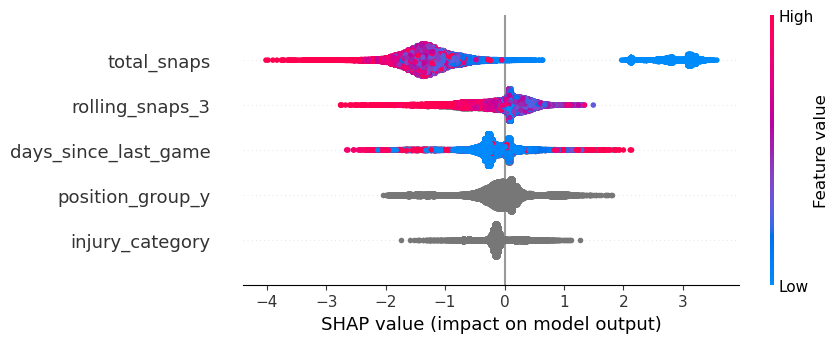

In [96]:
shap.plots.beeswarm(explanation)

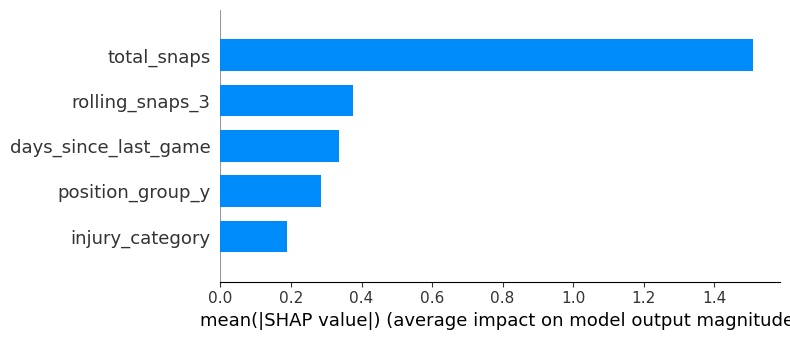

In [97]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


hm looks kinda bad lol idk